# Camara deputados, consolidação assiduidade

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 as sql
import seaborn as sns
import csv
import squarify 
from unidecode import unidecode
import os

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

In [2]:
!ls ../../dados/sql

base_completa_2020_09_10.db  base_completa.db  Normalização_03.ipynb


In [3]:
#Dados de parlamentares
con = sql.connect("../../dados/sql/base_completa.db")
df_eventos=pd.read_sql("select * from eventos_info",con)
df_presenca=pd.read_sql("select * from eventos_presenca",con)
con.close()

In [4]:
df_eventos.info()
tipos_eventos=list(df_eventos["EVENTO_TIPO"].unique())
len(tipos_eventos)
tipos_eventos
df_eventos.groupby("EVENTO_TIPO")["EVENTO_TIPO"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EVENTO_ID      4182 non-null   object
 1   EVENTO_URL     4182 non-null   object
 2   EVENTO_INICIO  4182 non-null   object
 3   EVENTO_FIM     3483 non-null   object
 4   EVENTO_STATUS  4182 non-null   object
 5   EVENTO_TIPO    4182 non-null   object
dtypes: object(6)
memory usage: 196.2+ KB


26

['Sessão Não Deliberativa de Debates',
 'Seminário',
 'Audiência Pública',
 'Reunião Deliberativa',
 'Sessão Não Deliberativa Solene',
 'Reunião de Eleição',
 'Reunião de Instalação e Eleição',
 'Outro Evento',
 'Sessão Deliberativa',
 'Mesa Redonda',
 'Diligência',
 'Reunião Técnica',
 'Reunião',
 'Reunião de Comparecimento de Ministro',
 'Comissão Geral',
 'Palestra',
 'Conferência',
 'Reunião de Instalação',
 'Teste do Painel Eletrônico',
 'Simpósio',
 'Painel',
 'Debate',
 'Sessão Preparatória - Eleição',
 'Sessão Preparatória - Posse',
 'Visita Técnica',
 'Evento Técnico']

EVENTO_TIPO                            EVENTO_TIPO                          
Audiência Pública                      Audiência Pública                         976
Comissão Geral                         Comissão Geral                              9
Conferência                            Conferência                                 5
Debate                                 Debate                                      5
Diligência                             Diligência                                 19
Evento Técnico                         Evento Técnico                             34
Mesa Redonda                           Mesa Redonda                               49
Outro Evento                           Outro Evento                              239
Painel                                 Painel                                      6
Palestra                               Palestra                                   44
Reunião                                Reunião                           

In [5]:
df_eventos["EVENTO_STATUS"].unique()
df_eventos.shape

array(['Encerrada(Comunicado)', 'Encerrada', 'Encerrada (Final)',
       'Cancelada', 'Encerrada (Termo)'], dtype=object)

(4182, 6)

In [6]:
df_eventos=df_eventos[df_eventos["EVENTO_STATUS"]!="Cancelada"].copy()

df_eventos.shape

(3681, 6)

In [7]:
eventos_relevantes=['Sessão Deliberativa']

In [8]:
df_eventos=df_eventos[df_eventos["EVENTO_TIPO"].isin(eventos_relevantes)].copy()
df_eventos.shape 

(258, 6)

In [9]:
df_eventos.shape
df_eventos.columns
df_presenca.info()
df_presenca.head()

(258, 6)

Index(['EVENTO_ID', 'EVENTO_URL', 'EVENTO_INICIO', 'EVENTO_FIM',
       'EVENTO_STATUS', 'EVENTO_TIPO'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200304 entries, 0 to 200303
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   EVENTO_ID      200304 non-null  object
 1   EVENTO_INICIO  200304 non-null  object
 2   ID             200304 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


,EVENTO_ID,EVENTO_INICIO,ID
0,53928,2019-03-20T10:21:33,66179
1,53928,2019-03-20T10:21:33,73460
2,53928,2019-03-20T10:21:33,121948
3,53928,2019-03-20T10:21:33,134812
4,53928,2019-03-20T10:21:33,160508


In [10]:
df_eventos.drop(columns=["EVENTO_URL","EVENTO_INICIO","EVENTO_FIM","EVENTO_STATUS"], inplace=True)


In [11]:
df_eventos.info()
df_presenca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 25 to 4178
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EVENTO_ID    258 non-null    object
 1   EVENTO_TIPO  258 non-null    object
dtypes: object(2)
memory usage: 6.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200304 entries, 0 to 200303
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   EVENTO_ID      200304 non-null  object
 1   EVENTO_INICIO  200304 non-null  object
 2   ID             200304 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


In [12]:

df=df_presenca[df_presenca.EVENTO_ID.isin(df_eventos.EVENTO_ID)]
df_eventos.shape
df.shape

(258, 2)

(115238, 3)

In [13]:
df.head()

,EVENTO_ID,EVENTO_INICIO,ID
765,54502,2019-02-12T14:00:00,66179
766,54502,2019-02-12T14:00:00,66828
767,54502,2019-02-12T14:00:00,67138
768,54502,2019-02-12T14:00:00,68720
769,54502,2019-02-12T14:00:00,69871


In [14]:
df.groupby("ID")["EVENTO_ID"].value_counts()

ID      EVENTO_ID
107283  54506        1
        54508        1
        54510        1
        54625        1
        54646        1
                    ..
98057   59838        1
        59846        1
        59888        1
        59889        1
        59894        1
Name: EVENTO_ID, Length: 115238, dtype: int64

In [15]:
x=df.groupby("ID")["EVENTO_ID"].value_counts()
df_contagem=x.unstack().fillna(0)
df_contagem["TOTAL"]=df_contagem.sum(axis=1)
df_contagem.head()

EVENTO_ID,54502,54506,54508,54510,54531,54583,54586,54587,54625,54646,...,59812,59819,59823,59829,59838,59846,59888,59889,59894,TOTAL
ID,,,,,,,,,,,,,,,,,,,,,
107283,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,193.0
108338,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,224.0
109429,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,235.0
112437,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,215.0
115746,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,235.0


In [16]:
df_contagem.sort_values("TOTAL", inplace=True, ascending=False)
df_contagem.head()
df_contagem.tail()

EVENTO_ID,54502,54506,54508,54510,54531,54583,54586,54587,54625,54646,...,59812,59819,59823,59829,59838,59846,59888,59889,59894,TOTAL
ID,,,,,,,,,,,,,,,,,,,,,
204528,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,250.0
204552,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,249.0
178983,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,249.0
204356,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,249.0
160587,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,249.0


EVENTO_ID,54502,54506,54508,54510,54531,54583,54586,54587,54625,54646,...,59812,59819,59823,59829,59838,59846,59888,59889,59894,TOTAL
ID,,,,,,,,,,,,,,,,,,,,,
178887,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
213854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
74141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
168175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
178963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [20]:
df_contagem=df_contagem[["TOTAL"]]
df_contagem["PERC_PRESENCA"]=df_contagem["TOTAL"]/250
df_contagem.sample(10)

EVENTO_ID,TOTAL,PERC_PRESENCA
ID,,
204521,236.0,0.944
204457,237.0,0.948
178994,224.0,0.896
204383,235.0,0.940
204359,236.0,0.944
178857,230.0,0.920
178972,224.0,0.896
204429,239.0,0.956
74383,178.0,0.712


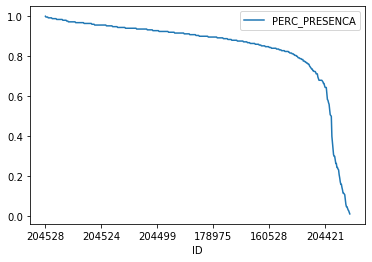

In [23]:
df_contagem.plot(y="PERC_PRESENCA")
df_contagem.drop(columns=["TOTAL"], inplace=True)

In [24]:
df_contagem.reset_index(drop=False, inplace=True)
df_contagem.head()

EVENTO_ID,ID,PERC_PRESENCA
0,204528,1.000
1,204552,0.996
2,178983,0.996
3,204356,0.996
4,160587,0.996


In [26]:
df_contagem.rename(columns={"ID":"ID_CAMARA"}, inplace=True)
df_contagem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_CAMARA      545 non-null    object 
 1   PERC_PRESENCA  545 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.6+ KB


In [27]:
df_contagem.to_csv("../../dados/camara/limpos/presenca.csv", sep=";",index=False)
